In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
my_cmap = ListedColormap(sns.color_palette(flatui).as_hex())


In [2]:
data = pd.read_csv("census2000.csv")
data.head(5)

,Sex,Year,Age,People
0,1,1900,0,4619544
1,1,2000,0,9735380
2,1,1900,5,4465783
3,1,2000,5,10552146
4,1,1900,10,4057669


# How does the distribution of population across age categories differ from 1900 to 2000?

In [3]:
data_1900 = data[data["Year"] == 1900]
agender_1900 = data_1900.groupby("Age").sum()
agender_1900 = agender_1900.reset_index()

In [4]:
data_2000 = data[data["Year"] == 2000]
agender_2000 = data_2000.groupby("Age").sum()
agender_2000 = agender_2000.reset_index()

In [5]:
ages = agender_1900["Age"].values
holder_1900 = {}
holder_2000 = {}
for age in ages:
    holder_1900[age] = agender_1900[agender_1900["Age"] == age]["People"].values[0]
    holder_2000[age] = agender_2000[agender_1900["Age"] == age]["People"].values[0]

In [46]:
holder_2000

{0: 19046094,
 5: 20621710,
 10: 20585757,
 15: 19930088,
 20: 19055559,
 25: 19178000,
 30: 20325175,
 35: 23110829,
 40: 22808830,
 45: 20186259,
 50: 17419067,
 55: 13380350,
 60: 10792360,
 65: 9258407,
 70: 8977000,
 75: 7268299,
 80: 5124536,
 85: 2951513,
 90: 1400884}

In [7]:
holder_1900

{0: 9208740,
 5: 8856266,
 10: 8059418,
 15: 7576589,
 20: 7445099,
 25: 6625336,
 30: 5584138,
 35: 4981620,
 40: 4266057,
 45: 3516438,
 50: 2983019,
 55: 2226540,
 60: 1804079,
 65: 1312875,
 70: 894754,
 75: 534090,
 80: 259884,
 85: 92622,
 90: 35257}

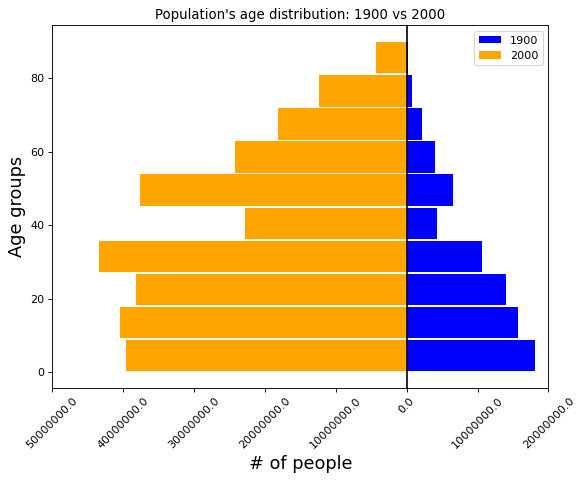

In [45]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
hN = plt.hist(holder_1900.keys(), weights=holder_1900.values(), rwidth=.95, label="1900", orientation = "horizontal", color = "blue")
hS = plt.hist(holder_2000.keys(), weights=holder_2000.values(), rwidth=.95, label="2000", orientation = "horizontal", color = "orange")
for p in hS[2]:
    p.set_width( - p.get_width())

xmin = min([ min(w.get_width() for w in hS[2]), 
                min([w.get_width() for w in hN[2]]) ])
xmin = np.floor(xmin)
xmax = max([ max(w.get_width() for w in hS[2]), 
                max([w.get_width() for w in hN[2]]) ])
xmax = np.ceil(xmax)
range = xmax - xmin
delta = 0.0 * range
plt.xlim([xmin - delta, xmax + delta])
xt = plt.xticks()
n = xt[0]
s = ['%.1f'%abs(i) for i in n]
plt.xticks(n, s, rotation = 45)
plt.legend(loc='best')
plt.axvline(0.0, color = "black")
plt.xlabel("# of people", fontsize = 16)
plt.ylabel("Age groups", fontsize = 16)
plt.title("Population's age distribution: 1900 vs 2000")
plt.show()

- As a statsitics major, I have been taught that the first thing we should do when given a dataset is to plot its distibution so as to get a high-level understaning of the data at hand. 
- In our dataset, we had census information from two years, 1900 and 2000. It would not make sense to visualize the distribution of pupoluation across both years, therefore my first step was too split the dataset on the basis of age.
- Next, I decided to look at the dsitribution of population irrespective of gender, therefore I grouped by ages to get the appropriate counts. 
- The way our data was structured, we already have the bins as well as the counts for these bins. Therefore, I could not use the hist function directly as that deals with data that has not already been counted. Therefore, I transformed my dataframe into a dictionary (I did not any other way of doing this) and then use the weight paramter or matplotlib to get the desired histograms.
- I initially plotted overlaaping histograms, however it did not look too nice therefore I decided to switch to back-to-back histograms to display the difference between the distributions. This allowed for me to display the distributions from 1900 and 2000 in a manner that allows users to only understand how are the populations distributed, but also compare them!
- I added the title, xlabel and ylabels, I decided to increase their font size. I added a legend but did not increase its font size as it was already visible enough and I did not want to take focus away from the visual itself. 
- I also played around with some color palettes from seaborn, however choosing different colors or even an sequential color palette for different age groups did not make sense to me as the change in color is not conveying any extra information to the viewer. I would consider changing the colors of each category by using a color map if the change in color itself was going to convey some extra information, however in this case we dont have any extra information to convey therefore I just went for solid colors. The orange-blue looked better than red-green, green-blue. 
- I added an axis line to split the histgorams, this is black in color to ensure that the demarkationbetween bars is clear. 
- Apart from the data transformations already described above, i had to figure out the xlims, ylims, where was i going to place each bar on the y axis, the width of each bin and the gap between each bin. I was able to do so as I have created similar visuals in an internship. 
